In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import scipy.stats
from scipy.interpolate  import interp1d
plt.rcParams['figure.dpi'] = 100

Text(0, 0.5, 'water activity')

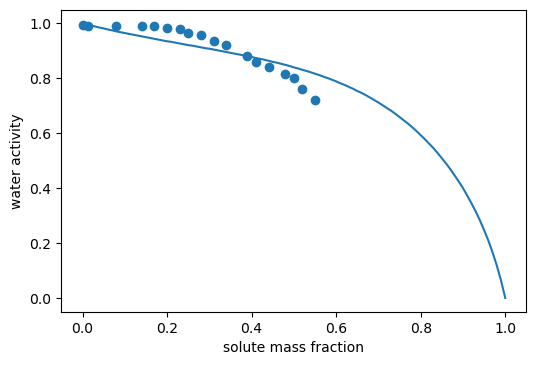

In [66]:
#import simulation points
f=r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\UoB-PostDoc\Organosulfates\aiaomfac-lines'

data =pd.read_csv(f+'.csv').T
x = data.iloc[2]
y= data.iloc[6]

interp_st=interp1d(x,y) # interpolate surface tension with size


## droplet measurements as experimental dataset
f = r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\UoB-PostDoc\Organosulfates\aw_NaEthyl' 
data2 = pd.read_csv(f+'.csv').T

d_x=data2.iloc[0]
d_y=data2.iloc[1]

plt.scatter(d_x,d_y)
plt.plot(x,y)
plt.xlabel('solute mass fraction')
plt.ylabel('water activity')

[ 0.007   0.0024  0.097   0.068   0.039   0.033   0.022   0.013   0.001
 -0.027  -0.032  -0.045  -0.044  -0.052  -0.05   -0.048  -0.039  -0.021 ]
0.043747779775596796
0.035577777777777764


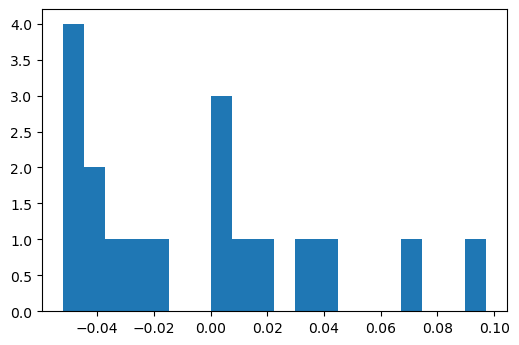

In [67]:
i=0
residuals=[]
while i < len(d_x):
    if d_x[i] < min(d_x):
        c_1=min(d_x)
    elif d_x[i] > max(d_x):
        c_1=max(d_x)
    else:
        c_1=d_x[i]
    st_i=d_y[i]
    st_1=interp_st(c_1)
    res=st_1-st_i
    residuals=np.append(residuals,res)
    i=i+1

plt.hist(residuals,bins=20)

print(residuals)
r2=residuals**2
sum_r2=np.sum(r2)
norm_sum=sum_r2/(len(d_x)-1)
rmse=np.sqrt(norm_sum)
print(rmse)



print(sum(abs(residuals))/len(d_x))

In [30]:
10.736769147029364/9.0316

1.1888003395887068

In [29]:
3.69/12.28

0.3004885993485342